# The Office: Understanding Success

Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula

#### Team Members Names:  Zachary Wieselthier, Laura Martin, Sean Worth, Ryan Nicholls



In [4]:
#Import Packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import shapiro #normality test
from scipy.stats import mstats
from fbprophet import Prophet


#Import Data and Create Data Frame
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The shareable link
link = 'https://drive.google.com/open?id=1hjyt_7I6fIoL5k_N9eL06lXrnZciaSRj' 
fluff, id = link.split('=')

# Dataset is now stored in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('The Office_Pub.csv')  
office = pd.read_csv('The Office_Pub.csv')
office.head(4)

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/discovery/v1/apis/drive/v2/rest
INFO:oauth2client.transport:Attempting refresh to obtain initial access_token
INFO:oauth2client.client:Refreshing access_token
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1hjyt_7I6fIoL5k_N9eL06lXrnZciaSRj?alt=json


,ID,Title,Director,Writer,Original Air Date,Rating,Michael,Dwight,Jim,Pam,...,Toby,Stanley,Meredith,Holly,Nellie,Creed,Gabe,Robert,David,Karen
0,1_1,"""Pilot""",Ken Kwapis,other,3/24/2005,8.4,97,35,37,46,...,0,5,0,0,0,0,0,0,0,0
1,1_2,"""Diversity Day""",Ken Kwapis,B. J. Novak,3/29/2005,8.2,103,40,35,26,...,2,5,0,0,0,0,0,0,0,0
2,1_3,"""Health Care""",Ken Whittingham,Paul Lieberstein,4/5/2005,7.8,69,88,57,44,...,0,6,3,0,0,0,0,0,0,0
3,1_4,"""The Alliance""",other,Michael Schur,4/12/2005,8.3,111,74,63,37,...,7,2,15,0,0,0,0,0,0,0


### Descriptive Statistics:

In [0]:
#Calculate Mean
avg_rating = office["Rating"].mean() 
#Calculate Median
med_rating =office['Rating'].median() 
#Calculate total number of episodes
count_episodes = office['ID'].count() 
from scipy.stats import shapiro
#Print Results
print 'Descriptive Statistics'
print'======================================'
print 'Average Episode Rating =', ("%.2f" % avg_rating)
print 'Median Episode Rating =',  med_rating
print 'Total number of Episodes =', count_episodes
print''
print 'Normality'
print'==================================='
stat, p = shapiro(office['Rating'])
print 'p = ', p
if p<.05:
   print 'Failed Normality Test'

Descriptive Statistics
Average Episode Rating = 8.28
Median Episode Rating = 8.3
Total number of Episodes = 186

Normality
p =  0.0949277952313


The average episode rating is an 8.28, and the median is a 8.3.

Population size is 186 episodes.

The rating follows a normal distribution tested by the Shapiro-Wilk test resulting in a P value of .095 which is greater than the alpha value of .05. This is important for meeting the assumptions of the ANOVA test.

### Histogram

Text(0.5,0,u'Rating')

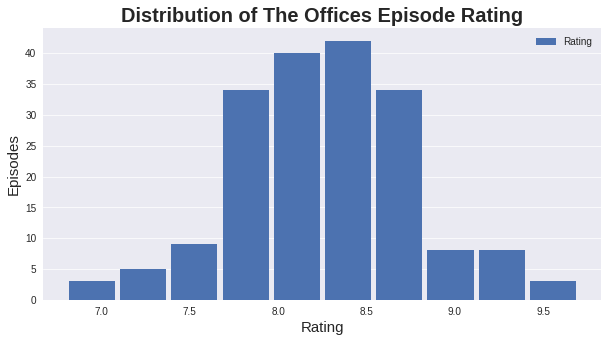

In [6]:
x = office[['Rating']]

#Plotting graph
x.plot.hist(figsize=(10,5), grid=False, bins=10, rwidth=.9)

#Naming the title of the graph, the y-axis, and the x-axis
plt.grid(axis='y', alpha=0.75)
plt.title('Distribution of The Offices Episode Rating', fontsize=20, fontweight='bold')
plt.ylabel('Episodes', fontsize=15)
plt.xlabel('Rating', fontsize=15)

By plotting a histogram to visualize the distribution of ratings per episode, we can observe that the data is normal. Most of the episodes ratings fall between 8.0 and 8.5, while some ratings were as low as 7.0 and as high as 9.5.  In descriptive statistics the difference between the average and the median episode rating is another representation of normality. The difference is .02 which confirms normality.  



### Linear Regression - Character Lines

In [0]:
#Defining Dependent Variable
Y = office['Rating']     

#Defining Independent Variables
X = office[['Jan','Andy','Angela','Darryl','Dwight','Erin','Jim','Kevin',
            'Nellie','Creed','Robert','Michael','Karen','David','Gabe','Holly',
            'Meredith','Stanley','Oscar','Toby','Pam','Kelly','Ryan','Phyllis']]    
           
#Adding the residual variable 
X = sm.add_constant(X)      

#Create and run the model 
model = sm.OLS(Y,X).fit()         
predictions = model.predict(X)      

#Print the regression model
print_model = model.summary()         
print (print_model)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4.748
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           7.49e-10
Time:                        00:16:25   Log-Likelihood:                -92.275
No. Observations:                 186   AIC:                             234.5
Df Residuals:                     161   BIC:                             315.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9140      0.122     64.843      0.0

A linear regression was used to understand the correlation between a characters presents and the episode’s rating; the more lines a character speaks the more presence they have in an episode.The regression resulted statistically significant with a P value of .000, suggesting that character presence has an impact on the rating of an episode. 

However, the model’s low R^2 value of .414 means that only 41% of the variance can be explained from characters speaking roles. There are other factors that explain a majority of the variance in an episodes rating.The majority of individual characters do not have a statistically significant correlation on the episodes rating based on having P Values greater than alpha of .05. 

Although, The characters that did result in statistical significance were Robert and Nellie with P values of .007 and .024, respectively. Moreover, they had negative corresponding coefficients of -.012 and -.014, respectively. This evidence tells us that there presence causes a negative effect on the episode rating. 


### Visualization:


Text(0.5,1.02,u'Signigicant Characters Pair Plots for The Office')

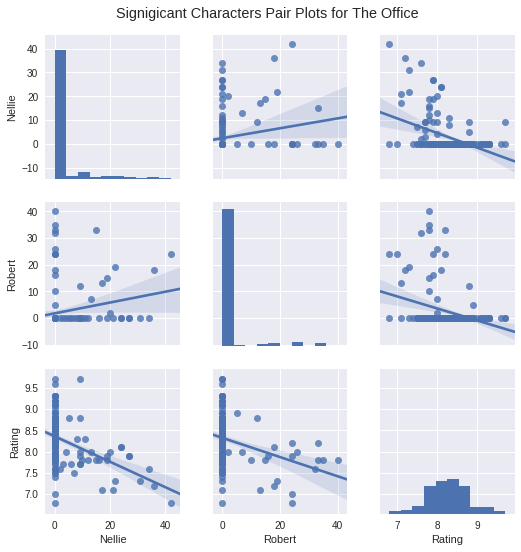

In [0]:
#In the regression table we found 2 characters with a negative significance to the rating: Nellie and Robert.

#Nellie and Robert compared to rating
lines_rating = office[['Nellie','Robert','Rating']] 

#Regression visual on significant characters vs rating
sns.pairplot(lines_rating, kind='reg')

plt.suptitle('Signigicant Characters Pair Plots for The Office', y=1.02)

As we have stated before in the regression table it was found that two characters contributed a negative significance to the rating: Nellie and Robert. A pairplot was run to visualize the slope of the regression line.

### Director Hypothesis Test

In [0]:
#ANOVA on Director
Dresults = ols('Rating ~ C(Director)', data=office).fit()
Dresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.405
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           0.000431
Time:                        00:16:34   Log-Likelihood:                -125.51
No. Observations:                 186   AIC:                             273.0
Df Residuals:                     175   BIC:                             308.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           8.4000      0.173     48.503      0.000       8.058       8.742
C(Director)[T.David Rogers]        -0.2667      0.238     -1.120      0.264      -0.736       0.203
C(Director)[T.Greg Daniels]        -0.0308      0.220     -0.140      0.889      -0.465       0.404
C(Director)[T.Jeffrey Blitz]        0.0636      0.228      0.280      0.780      -0.386       0.513
C(Director)[T.Ken Kwapis]           0.2538      0.220      1.153      0.250      -0.181       0.688
C(Director)[T.Ken Whittingham]     -0.0778      0.238     -0.327      0.744      -0.548       0.392
C(Director)[T.Matt Sohn]           -0.6000      0.245     -2.450      0.015      -1.083      -0.117
C(Director)[T.Paul Feig]            0.3000      0.217      1.382      0.169      -0.128       0.728
C(Director)[T.Paul Lieberstein]    -0.1857      0.254     -0.733      0.465      -0.686       0.315
C(Director)[T.Randall Einhorn]     -0.1733      0.214     -0.808      0.420      -0.597       0.250
C(Director)[T.other]               -0.2418      0.182     -1.330      0.185      -0.600       0.117
==============================================================================
Omnibus:                        1.682   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.371
Skew:                          -0.064   Prob(JB):                        0.504
Kurtosis:                       3.401   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

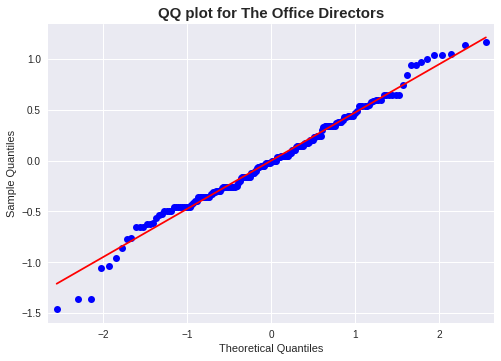

In [0]:
#QQ Plot
Dresults = Dresults.resid 
fig = sm.qqplot(Dresults, line='s')
plt.title('QQ plot for The Office Directors', fontsize=15, fontweight='bold')
plt.show()

An analysis of variance was ran on the directors. The model has a low R squared value of .163 mening 16% of the variance comes from the directors. The model is statistically significant with a P value of .000, however that does not explain all of the dependent variable. 

Who directed an Episode had a statistically significant effect on the rating of the episode. Significant directors include Matt Sohn but his corresponding coefficient is -.600, which tells us he negatively impacts the rating. His average rating is a 7.8. 

The QQ resulted in a mostly normal distribution with an increased distance near the outliers. Looking at the QQ plot the majority of the points on the line but The 13 points which give the line its curve are the outliers which must be important factors since they cause the R squared to go down. 

Statistically Significant Directors         | Model Coef | Avg. Rating
------------- | -------------
Matt Sohn  | -.600 | 7.8




### Writer Hypothesis Test

In [0]:
#ANOVA on Writers
wresults = ols('Rating ~ C(Writer)', data=office).fit()
wresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.836
Date:                Mon, 24 Dec 2018   Prob (F-statistic):             0.0512
Time:                        00:16:41   Log-Likelihood:                -131.83
No. Observations:                 186   AIC:                             287.7
Df Residuals:                     174   BIC:                             326.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        8.0167      0.207     38.638      0.000       7.607       8.426
C(Writer)[T.B. J. Novak]                         0.2967      0.245      1.208      0.229      -0.188       0.781
C(Writer)[T.Brent Forrester]                     0.5500      0.268      2.053      0.042       0.021       1.079
C(Writer)[T.Charlie Grandy]                     -0.0595      0.283     -0.211      0.834      -0.618       0.499
C(Writer)[T.Gene Stupnitsky & Lee Eisenberg]     0.4208      0.274      1.533      0.127      -0.121       0.963
C(Writer)[T.Greg Daniels]                        0.6500      0.268      2.427      0.016       0.121       1.179
C(Writer)[T.Jennifer Celotta]                    0.1708      0.274      0.622      0.534      -0.371       0.713
C(Writer)[T.Justin Spitzer]                      0.3278      0.268      1.224      0.223      -0.201       0.856
C(Writer)[T.Michael Schur]                       0.4976      0.283      1.760      0.080      -0.060       1.056
C(Writer)[T.Mindy Kaling]                        0.3083      0.237      1.303      0.194      -0.159       0.775
C(Writer)[T.Paul Lieberstein]                    0.3910      0.251      1.559      0.121      -0.104       0.886
C(Writer)[T.other]                               0.1460      0.216      0.677      0.499      -0.280       0.572
==============================================================================
Omnibus:                        0.840   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.505
Skew:                           0.042   Prob(JB):                        0.777
Kurtosis:                       3.241   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

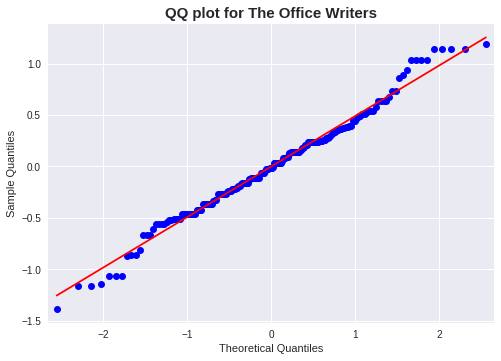

In [0]:
#QQ Plot
wresults = wresults.resid 
fig = sm.qqplot(wresults, line='s')
plt.title('QQ plot for The Office Writers', fontsize=15, fontweight='bold')
plt.show()

An analysis of variance was ran on the writer. There were more significant writers than directors. All the writers who had a statistically significant difference had higher than average episode rating. The difference was more than that of director. The model has a low R squared value of .104 meaning 10% of the variance of rating is attributed from writers. The model is statistically significant with a P value of .051, however it does not explain all of the dependent variable. 

Who wrote an Episode has a statistically significant effect on the rating of the episode. Significant writers include: Brent Forrester and Greg Daniels, their corresponding coefficients are .550 and .650, respectively, which tells us they positively impact the rating. Their average ratings are 8.56 and 8.66 respectively.

The QQ resulted in a mostly normal distribution with an increased distance near the outliers. Looking at the QQ plot the majority of the points being on the line but The 18 points which are the outliers give the line its curve must be important factors because they are the cause R squared value down. 

Statistically Significant Writers         | Model Coef | Avg. Rating
------------- | -------------
Brent Forrester  | .550| 8.56
Greg Daniels| .650 | 8.66


### Box and Wisker Plot

Text(0.5,0,u'Character')

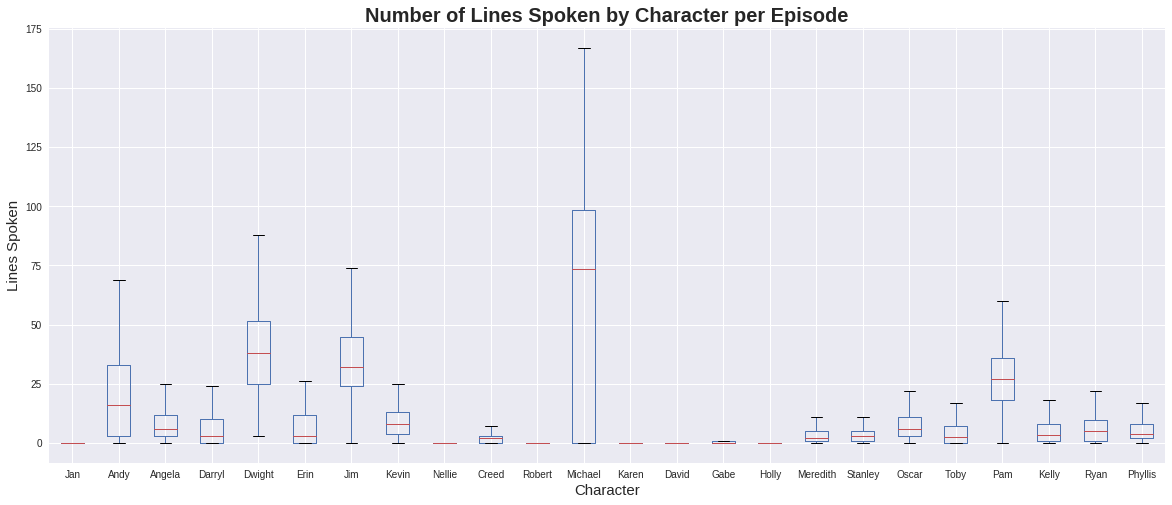

In [0]:
#Box Plot Number of lines spoken by each main character

lines = office[['Jan','Andy','Angela','Darryl','Dwight','Erin','Jim','Kevin','Nellie','Creed','Robert','Michael','Karen','David','Gabe','Holly','Meredith','Stanley','Oscar','Toby','Pam','Kelly','Ryan','Phyllis']]

#Plotting graph
lines.boxplot(figsize=(20,8)) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Number of Lines Spoken by Character per Episode',fontsize=20, fontweight='bold')
plt.ylabel('Lines Spoken', fontsize=15)
plt.xlabel('Character', fontsize=15) 

By using a boxplot to visualize the distribution of the number of lines spoken by each character per episode. We can see that the main character, Michael, spoke most of the lines ranging from 0 to 168 lines and he had a median around 75. He also has the largest distribution with 25% of the episodes having zero lines.The main cast, Michael, Pam, Jim, and Dwight can be separated by speaking more than 25 lines per episode, while everyone else spoke less. 

In conclusion directors, writers, and lines spoken by characters have a statistically significant impact on an episodes rating. Director has more of an impact than Writer and number of lines spoken. Only two characters had a statistically significant impact, both being negative. These characters being Robert and Nellie. Both of whom have a low average and destitution as shown in the box plot. 

  These models are a good fit for the data, however they don’t explain all of variation in ratings.


#Time Series

In [0]:
#Renaming the date and rating columns to datestamp and y for the rating measurement
office.rename(columns={'Original Air Date':'ds',
                          'Rating':'y'}, 
                 inplace=True)
office.head(3)

,ID,Title,Director,Writer,ds,y,Michael,Dwight,Jim,Pam,...,Toby,Stanley,Meredith,Holly,Nellie,Creed,Gabe,Robert,David,Karen
0,1_1,"""Pilot""",Ken Kwapis,other,3/24/2005,8.4,97,35,37,46,...,0,5,0,0,0,0,0,0,0,0
1,1_2,"""Diversity Day""",Ken Kwapis,B. J. Novak,3/29/2005,8.2,103,40,35,26,...,2,5,0,0,0,0,0,0,0,0
2,1_3,"""Health Care""",Ken Whittingham,Paul Lieberstein,4/5/2005,7.8,69,88,57,44,...,0,6,3,0,0,0,0,0,0,0


Text(0.5,0,u'Episode')

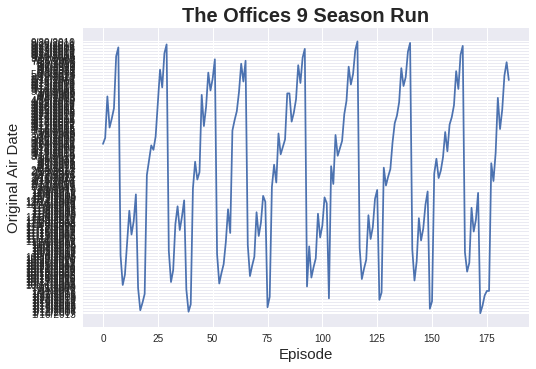

In [0]:
#Checking stationarity of time series
ts = office['ds']

plt.plot(ts)
plt.title('The Offices 9 Season Run',fontsize=20, fontweight='bold')
plt.ylabel('Original Air Date', fontsize=15)
plt.xlabel('Episode', fontsize=15) 

In [0]:
model = Prophet()
model.fit(office)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
546,2014-05-12
547,2014-05-13
548,2014-05-14
549,2014-05-15
550,2014-05-16


In [0]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
546,2014-05-12,8.221396,7.676132,8.698757
547,2014-05-13,8.017784,7.513377,8.537686
548,2014-05-14,8.305058,7.769979,8.812636
549,2014-05-15,8.320700,7.748899,8.819690
550,2014-05-16,8.665243,8.136626,9.136357


Text(0.5,33,u'Year')

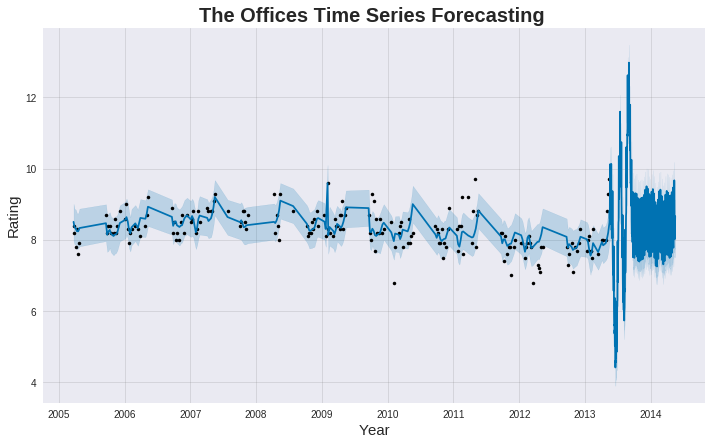

In [0]:
fig1 = model.plot(forecast)
plt.title('The Offices Time Series Forecasting ',fontsize=20, fontweight='bold')
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Year', fontsize=15)

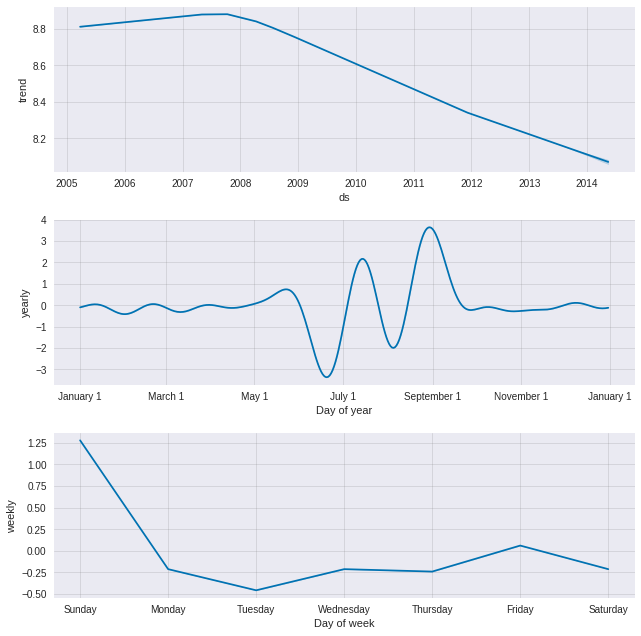

In [0]:
fig2 = model.plot_components(forecast)

#Forcasting

In [0]:
import sklearn
from sklearn import model_selection

###Preparing Data

In [0]:
df_x = office.drop(columns = ['ID', 'Title', 'ds','y', 'Director', 'Writer'])
df_y = office['y']

In [0]:
#One Hot Director
dir_one_hot = pd.get_dummies(office['Director'])
dir_one_hot.columns = dir_one_hot.columns.str.lower()
dir_one_hot.head(1)

,charles mcdougall,david rogers,greg daniels,jeffrey blitz,ken kwapis,ken whittingham,matt sohn,paul feig,paul lieberstein,randall einhorn,other
0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
#One hot Writer
wir_one_hot = pd.get_dummies(office['Writer'])
wir_one_hot.columns = wir_one_hot.columns.str.upper()
wir_one_hot.head(1)

,AARON SHURE,B. J. NOVAK,BRENT FORRESTER,CHARLIE GRANDY,GENE STUPNITSKY & LEE EISENBERG,GREG DANIELS,JENNIFER CELOTTA,JUSTIN SPITZER,MICHAEL SCHUR,MINDY KALING,PAUL LIEBERSTEIN,OTHER
0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# Combines one Hots to Lines Spoken
df_x = df_x.join(dir_one_hot)
df_x = df_x.join(wir_one_hot)
df_x.head(1)

,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,Oscar,Erin,Ryan,...,BRENT FORRESTER,CHARLIE GRANDY,GENE STUPNITSKY & LEE EISENBERG,GREG DANIELS,JENNIFER CELOTTA,JUSTIN SPITZER,MICHAEL SCHUR,MINDY KALING,PAUL LIEBERSTEIN,OTHER
0,97,35,37,46,0,2,5,6,0,10,...,0,0,0,0,0,0,0,0,0,1


In [0]:
#Seperates Data for training and testing
x_train,x_test,y_train,y_test = model_selection.train_test_split(df_x,df_y,test_size = .3, random_state = 2)

NameError: ignored

###Linear Regression

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics


param_grid = dict(fit_intercept = ['True', 'False'])


grid_search = GridSearchCV(linear_model.LinearRegression(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

NameError: ignored

Score:  -0.5057829024960061
Mean Squared Error:  0.33749031526701795
----------------------------------------------------------------


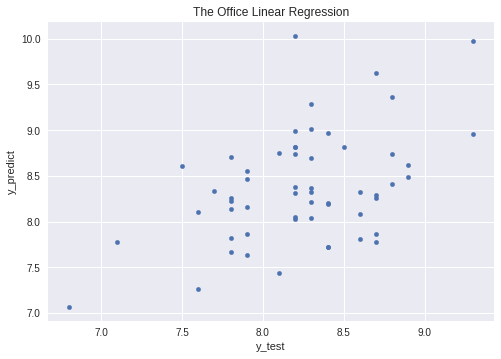

In [0]:
model = linear_model.LinearRegression(normalize= 'True')
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Office Linear Regression')

### K Neighbors Regression

 Score:  0.3979646412671015
Mean Squared Error:  0.13493386243386243
----------------------------------------------------------------


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


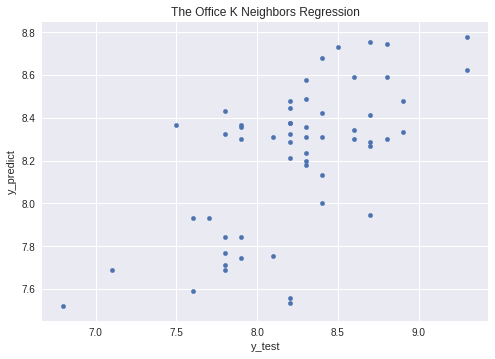

In [0]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=9, leaf_size = 25, p=1)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Office K Neighbors Regression')

In [0]:
from sklearn import metrics
n_neighbors = range(3,15)
leaf_size = range(25,35)
p=[1,2]

param_grid = dict(n_neighbors=n_neighbors, leaf_size=leaf_size, p=p)


grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.399522 using {'n_neighbors': 9, 'leaf_size': 25, 'p': 1}


###Stochastic Gradient Descent Regression

In [0]:
from sklearn import metrics


param_grid = dict(loss = [
    'squared_loss',
    'huber',
    'epsilon_insensitive', 
    'squared_epsilon_insensitive'
], max_iter = numpy.arange(100,2000,50))


grid_search = GridSearchCV(linear_model.SGDRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -1.581451 using {'loss': 'huber', 'max_iter': 1400}


Score:  -24.14511484588535
Mean Squared Error:  5.635761119811046
----------------------------------------------------------------


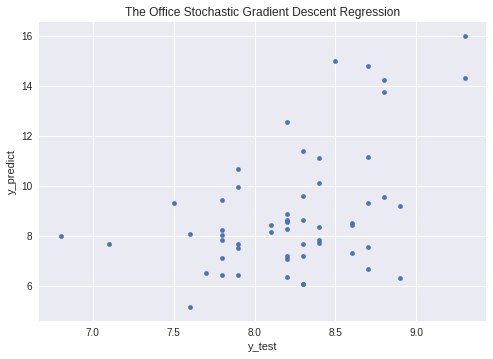

In [0]:
model = linear_model.SGDRegressor(loss = 'huber', max_iter = 1400)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Office Stochastic Gradient Descent Regression')

### Decision Tree Regression

In [0]:
from sklearn import metrics

param_grid = dict(max_depth = range(3,46))


grid_search = GridSearchCV(tree.DecisionTreeRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.517067 using {'max_depth': 3}


Score:  0.1474609677610168
Mean Squared Error:  0.1910791165783847
-----------------a-----------------------------------------------


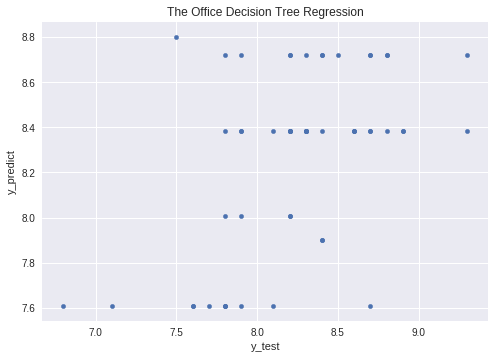

In [0]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Office Decision Tree Regression')

### Neural Network Regression

In [0]:
from sklearn import metrics
import numpy

param_grid = dict(hidden_layer_sizes = numpy.arange(80, 200, 20),
                 activation = ['identity', 'logistic', 'tanh', 'relu'])


grid_search = GridSearchCV(sklearn.neural_network.MLPRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.353604 using {'activation': 'logistic', 'hidden_layer_sizes': 140}


Score:  0.3212305511781031
Mean Squared Error:  0.15213223293796135
-----------------a-----------------------------------------------


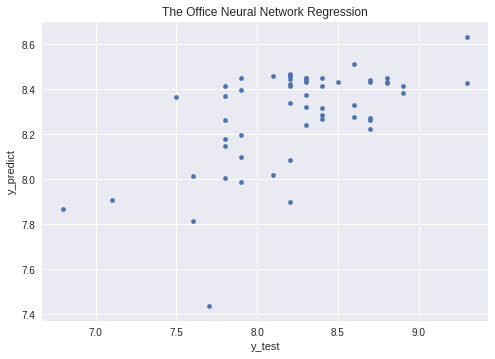

In [0]:
from sklearn import neural_network
model = sklearn.neural_network.MLPRegressor(activation = 'logistic', hidden_layer_sizes = 140)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Office Neural Network Regression')

## Decision Forest

In [0]:
from sklearn import metrics
from sklearn import ensemble
import numpy

param_grid = dict(n_estimators = numpy.arange(5,30,5), max_depth = numpy.arange(3,46) )


grid_search = GridSearchCV(sklearn.ensemble.RandomForestRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.419098 using {'n_estimators': 20, 'max_depth': 17}


Score:  0.3304969624539396
Mean Squared Error:  0.15005535714285706
----------------------------------------------------------------


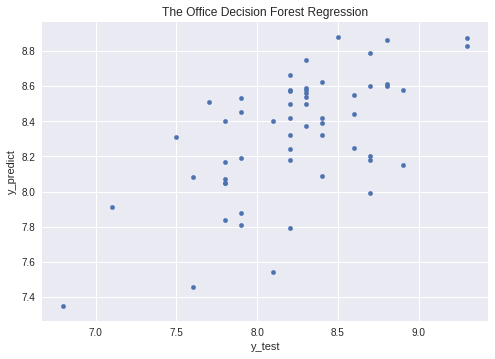

In [0]:
from sklearn import ensemble


model = sklearn.ensemble.RandomForestRegressor(n_estimators = 10, max_depth =28)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Office Decision Forest Regression')

